In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [16]:
import cv2
from ultralytics import solutions


In [17]:
# Mở file video cần xử lý
cap = cv2.VideoCapture("/content/thai.mp4")
assert cap.isOpened(), "Error reading video file"

# Lấy thông tin video
w, h, fps = (
    int(cap.get(x))
    for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS)
)

# Định nghĩa các điểm tạo thành vùng đếm
# region_points = [(20, 400), (1080, 400)]  # Đếm đối tượng qua một đường thẳng
region_points = [
    (430, 700),  # Góc trên bên trái
    (1600, 700), # Góc trên bên phải
    (1600, 1080), # Góc dưới bên phải
    (430, 1080),  # Góc dưới bên trái
]  # Vùng đếm hình chữ nhật: top left, top right, bottom right, bottom left


In [18]:
# Video writer
video_writer = cv2.VideoWriter(
    "./run/thai_counted.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (w, h)
)


In [19]:
# Init ObjectCounter
counter = solutions.ObjectCounter(
    show=False,  # Không hiển thị đầu ra
    region=region_points,  # Truyền các điểm khu vực đếm
    model="yolo11x.pt",  # Sử dụng mô hình YOLO11x cho việc đếm đối tượng
    # Nếu muốn dùng mô hình YOLO11 OBB (Oriented Bounding Boxes), sử dụng:
    # model="yolo11n-obb.pt"
)


Ultralytics Solutions: ✅ {'region': [(430, 700), (1600, 700), (1600, 1080), (430, 1080)], 'show_in': True, 'show_out': True, 'colormap': None, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'json_file': None, 'records': 5, 'show': False, 'model': 'yolo11x.pt'}
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



In [21]:
# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    # Đếm đối tượng và theo dõi với YOLO
    results = model.track(im0, persist=True, show=False)

    # Lấy kết quả và vẽ lên khung hình
    im0 = results[0].plot()

    # Ghi video đã xử lý
    video_writer.write(im0)

# Giải phóng tài nguyên
cap.release()
video_writer.release()
cv2.destroyAllWindows()



0: 640x384 19 persons, 10 cars, 19 motorcycles, 1 truck, 22.8ms
Speed: 3.2ms preprocess, 22.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 6 cars, 9 motorcycles, 20.5ms
Speed: 2.5ms preprocess, 20.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 8 cars, 9 motorcycles, 20.4ms
Speed: 2.5ms preprocess, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 8 cars, 10 motorcycles, 21.6ms
Speed: 2.7ms preprocess, 21.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 8 cars, 9 motorcycles, 20.3ms
Speed: 2.5ms preprocess, 20.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 bicycle, 8 cars, 11 motorcycles, 21.3ms
Speed: 2.6ms preprocess, 21.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 bicycle, 8 cars, 13 motorcycles, 20.4ms
Speed: 2.6


0: 640x384 (no detections), 22.3ms
Speed: 2.6ms preprocess, 22.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)


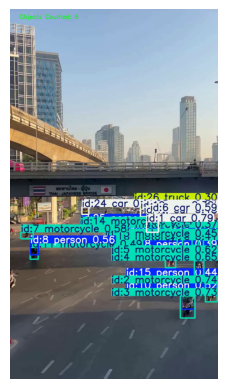

In [22]:
import cv2
from matplotlib import pyplot as plt

# Đọc video
video_path = '/content/run/thai_tracked.mp4'
cap = cv2.VideoCapture(video_path)

# Lấy một khung hình cụ thể (ví dụ, lấy khung hình đầu tiên)
ret, frame = cap.read()
cap.release()

if ret:
    # Xử lý khung hình bằng YOLO (nếu cần)
    results = model.track(frame, persist=True, show=False)

    # Lấy khung hình đã xử lý
    processed_frame = results[0].plot()

    # Chuyển đổi từ BGR sang RGB để hiển thị trong matplotlib
    processed_frame_rgb = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh bằng matplotlib
    plt.imshow(processed_frame_rgb)
    plt.axis('off')  # Tắt trục
    plt.show()

else:
    print("Không thể đọc video!")
